# 目录
51. 使用绝对路径读取本地Excel数据
52. 查看数据前三行
53. 查看每列数据缺失值情况
54. 提取日期中含有空值的行
55. 输出每列缺失值具体行数
56. 删除所有存在缺失值的行
57. 绘制收盘价的折线图
58. 同时绘制开盘价与收盘价
59. 绘制涨跌幅的直方图
60. 让直方图更细致
61. 以data的列名创建一个dataframe
62. 打印所有换手率不是数字的行
63. 打印所有换手率为--的行
64. 重置data的行号
65. 删除所有换手率非数字的行
66. 绘制换手率的密度曲线
67. 计算前一天与后一天收盘价的差值
68. 计算前一天与后一天收盘价的变化率
69. 设置日期为索引

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] # 设置字体
plt.rcParams["axes.unicode_minus"] = False # 该语句解决图像中的“-”负号的乱码问题

In [64]:
# 50. 使用绝对路径读取本地Excel数据
data = pd.read_excel(r"C:\Users\Monty _L\Documents\GitHub\Mathematical-modeling\learn\数据分析\demo3.xlsx")
data

,代码,简称,日期,前收盘价,开盘价,最高价,最低价,收盘价,成交量,成交金额,涨跌,涨跌幅,均价,换手率,A股流通市值,总市值
0,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610.0,7.544258e+08,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11
1,600001.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793.0,1.034181e+09,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11
2,600002.SH,浦发银行,2016-01-06,15.8618,16.0208,16.0208,15.6234,15.9855,46772653.0,8.386674e+08,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11
3,600003.SH,浦发银行,2016-01-07,15.9855,15.8088,15.8088,15.3672,15.4644,11350479.0,1.995027e+08,-0.5211,-3.2597,17.5766,0.0608,3.266223e+11,3.266223e+11
4,600004.SH,浦发银行,2016-01-08,15.4544,15.6675,15.7912,14.9345,15.4467,71918296.0,1.262105e+09,-0.0177,-0.1142,17.5492,0.3855,3.262492e+11,3.262492e+11
5,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,数据来源,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# 52. 查看数据前三行
data.head(3)

,代码,简称,日期,前收盘价,开盘价,最高价,最低价,收盘价,成交量,成交金额,涨跌,涨跌幅,均价,换手率,A股流通市值,总市值
0,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610.0,7.544258e+08,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11
1,600001.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793.0,1.034181e+09,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11
2,600002.SH,浦发银行,2016-01-06,15.8618,16.0208,16.0208,15.6234,15.9855,46772653.0,8.386674e+08,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11


In [66]:
# 53. 查看每列数据缺失值情况
data.isnull().sum()

代码        1
简称        2
日期        2
前收盘价      2
开盘价       2
最高价       2
最低价       2
收盘价       2
成交量       2
成交金额      2
涨跌        2
涨跌幅       2
均价        2
换手率       2
A股流通市值    2
总市值       2
dtype: int64

In [67]:
# 54. 提取日期中含有空值的行
data[data['日期'].isnull()]

,代码,简称,日期,前收盘价,开盘价,最高价,最低价,收盘价,成交量,成交金额,涨跌,涨跌幅,均价,换手率,A股流通市值,总市值
5,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,数据来源,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# 55. 输出每列缺失值具体行数
for col in data.columns:
    if data[col].count() != len(data):
        loc = data[col][data[col].isnull().values == True].index.tolist()
        print(f"{col}: {loc}")

代码: [5]
简称: [5, 6]
日期: [5, 6]
前收盘价: [5, 6]
开盘价: [5, 6]
最高价: [5, 6]
最低价: [5, 6]
收盘价: [5, 6]
成交量: [5, 6]
成交金额: [5, 6]
涨跌: [5, 6]
涨跌幅: [5, 6]
均价: [5, 6]
换手率: [5, 6]
A股流通市值: [5, 6]
总市值: [5, 6]


In [69]:
# 56. 删除所有存在缺失值的行
data.dropna(axis=0, how='any', inplace=True)
data

,代码,简称,日期,前收盘价,开盘价,最高价,最低价,收盘价,成交量,成交金额,涨跌,涨跌幅,均价,换手率,A股流通市值,总市值
0,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610.0,7.544258e+08,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11
1,600001.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793.0,1.034181e+09,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11
2,600002.SH,浦发银行,2016-01-06,15.8618,16.0208,16.0208,15.6234,15.9855,46772653.0,8.386674e+08,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11
3,600003.SH,浦发银行,2016-01-07,15.9855,15.8088,15.8088,15.3672,15.4644,11350479.0,1.995027e+08,-0.5211,-3.2597,17.5766,0.0608,3.266223e+11,3.266223e+11
4,600004.SH,浦发银行,2016-01-08,15.4544,15.6675,15.7912,14.9345,15.4467,71918296.0,1.262105e+09,-0.0177,-0.1142,17.5492,0.3855,3.262492e+11,3.262492e+11


<AxesSubplot:>

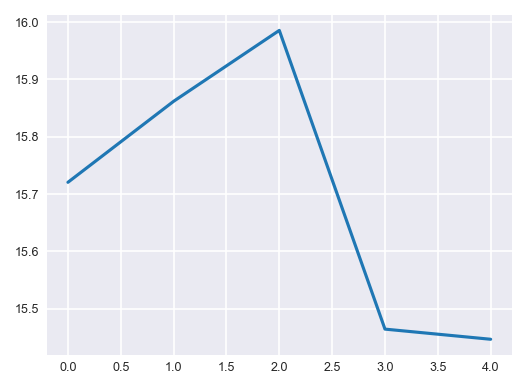

In [70]:
# 57. 绘制收盘价的折线图

plt.style.use('seaborn-darkgrid')
plt.rc('font',size=6)
plt.rc('figure',figsize=(4,3),dpi=150)
data['收盘价'].plot()

<AxesSubplot:>

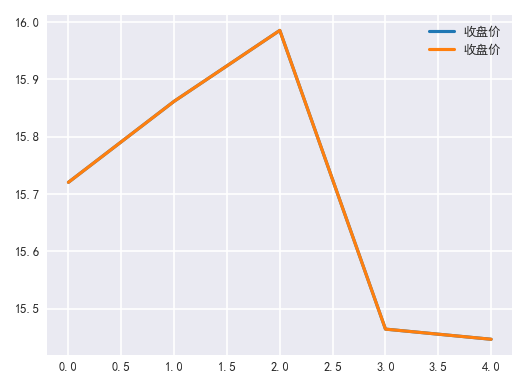

In [71]:
# 58. 同时绘制开盘价与收盘价
plt.rcParams["font.sans-serif"]=["SimHei"] # 设置字体
plt.rcParams["axes.unicode_minus"] = False # 该语句解决图像中的“-”负号的乱码问题
# 此图中两条线重合了
data[['收盘价','收盘价']].plot()

(array([1., 1., 0., 0., 0., 0., 0., 1., 0., 2.]),
 array([-3.2597 , -2.84384, -2.42798, -2.01212, -1.59626, -1.1804 ,
        -0.76454, -0.34868,  0.06718,  0.48304,  0.8989 ]),
 <BarContainer object of 10 artists>)

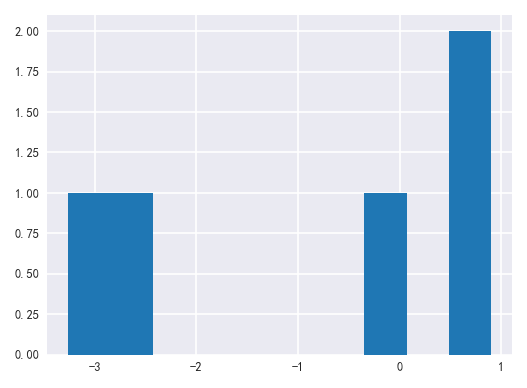

In [72]:
# 59. 绘制涨跌幅的直方图
plt.hist(data['涨跌幅'])

<AxesSubplot:>

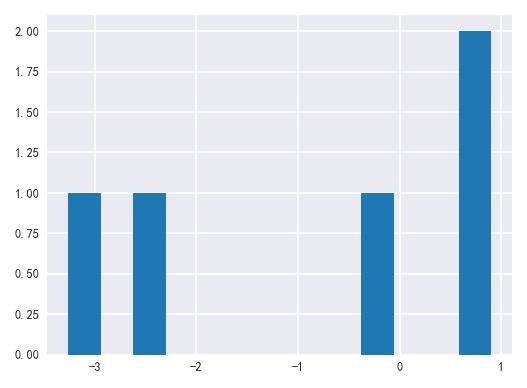

In [73]:
# 60. 让直方图更细致
# 具体参数设置见官方文档
data['涨跌幅'].hist(bins=13)

In [74]:
# 61. 以data的列名创建一个dataframe
temp = pd.DataFrame(columns=data.columns.to_list())
temp

,代码,简称,日期,前收盘价,开盘价,最高价,最低价,收盘价,成交量,成交金额,涨跌,涨跌幅,均价,换手率,A股流通市值,总市值


In [75]:
# 62. 打印所有换手率不是数字的行
for i in range(len(data)):
    if type(data.iloc[i,1]) != float:
        temp = temp.append(data.loc[i])

temp

C:\Users\Monty _L\AppData\Local\Temp\ipykernel_27704\1161557867.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append(data.loc[i])
C:\Users\Monty _L\AppData\Local\Temp\ipykernel_27704\1161557867.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append(data.loc[i])
C:\Users\Monty _L\AppData\Local\Temp\ipykernel_27704\1161557867.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append(data.loc[i])
C:\Users\Monty _L\AppData\Local\Temp\ipykernel_27704\1161557867.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp = temp.append(data.loc[i])
C:\Users\Monty _L\AppData\Local\Temp\ipykernel_27704

,代码,简称,日期,前收盘价,开盘价,最高价,最低价,收盘价,成交量,成交金额,涨跌,涨跌幅,均价,换手率,A股流通市值,总市值
0,600000.SH,浦发银行,2016-01-04 00:00:00,16.1356,16.1444,16.1444,15.4997,15.7205,42240610.0,754425783.0,-0.4151,-2.5725,17.8602,0.2264,332031800000.0,332031800000.0
1,600001.SH,浦发银行,2016-01-05 00:00:00,15.7205,15.4644,15.9501,15.3672,15.8618,58054793.0,1034181474.0,0.1413,0.8989,17.8139,0.3112,335016300000.0,335016300000.0
2,600002.SH,浦发银行,2016-01-06 00:00:00,15.8618,16.0208,16.0208,15.6234,15.9855,46772653.0,838667398.0,0.1236,0.7795,17.9307,0.2507,337627800000.0,337627800000.0
3,600003.SH,浦发银行,2016-01-07 00:00:00,15.9855,15.8088,15.8088,15.3672,15.4644,11350479.0,199502702.0,-0.5211,-3.2597,17.5766,0.0608,326622300000.0,326622300000.0
4,600004.SH,浦发银行,2016-01-08 00:00:00,15.4544,15.6675,15.7912,14.9345,15.4467,71918296.0,1262105060.0,-0.0177,-0.1142,17.5492,0.3855,326249200000.0,326249200000.0


In [76]:
# 63. 打印所有换手率为--的行
data[data['换手率'].isin(['--'])]

,代码,简称,日期,前收盘价,开盘价,最高价,最低价,收盘价,成交量,成交金额,涨跌,涨跌幅,均价,换手率,A股流通市值,总市值


In [77]:
# 64. 重置data的行号
data = data.reset_index()
data

,index,代码,简称,日期,前收盘价,开盘价,最高价,最低价,收盘价,成交量,成交金额,涨跌,涨跌幅,均价,换手率,A股流通市值,总市值
0,0,600000.SH,浦发银行,2016-01-04,16.1356,16.1444,16.1444,15.4997,15.7205,42240610.0,7.544258e+08,-0.4151,-2.5725,17.8602,0.2264,3.320318e+11,3.320318e+11
1,1,600001.SH,浦发银行,2016-01-05,15.7205,15.4644,15.9501,15.3672,15.8618,58054793.0,1.034181e+09,0.1413,0.8989,17.8139,0.3112,3.350163e+11,3.350163e+11
2,2,600002.SH,浦发银行,2016-01-06,15.8618,16.0208,16.0208,15.6234,15.9855,46772653.0,8.386674e+08,0.1236,0.7795,17.9307,0.2507,3.376278e+11,3.376278e+11
3,3,600003.SH,浦发银行,2016-01-07,15.9855,15.8088,15.8088,15.3672,15.4644,11350479.0,1.995027e+08,-0.5211,-3.2597,17.5766,0.0608,3.266223e+11,3.266223e+11
4,4,600004.SH,浦发银行,2016-01-08,15.4544,15.6675,15.7912,14.9345,15.4467,71918296.0,1.262105e+09,-0.0177,-0.1142,17.5492,0.3855,3.262492e+11,3.262492e+11


In [78]:
# 65. 删除所有换手率非数字的行
k = []
for i in range(len(data)):
    if type(data.iloc[i,1]) != float:
        k.append(i)

data.drop(labels = k,inplace=True)

ValueError: zero-size array to reduction operation fmax which has no identity

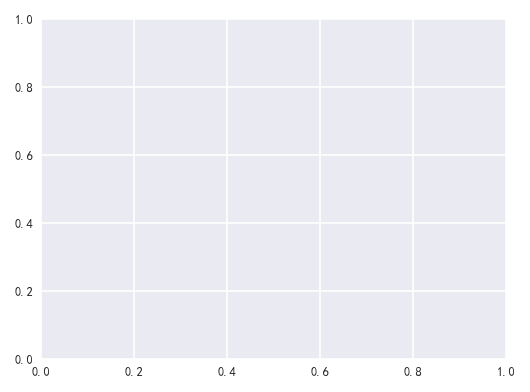

In [79]:
# 66. 绘制换手率的密度曲线
data['换手率'].plot(kind = 'kde')

In [ ]:
# 67. 计算前一天与后一天收盘价的差值
data['收盘价'].diff()

In [81]:
# 68. 计算前一天与后一天收盘价的变化率
data['收盘价'].pct_change()

Series([], Name: 收盘价, dtype: float64)

In [80]:
# 69. 设置日期为索引
data = data.set_index('日期')
data

,index,代码,简称,前收盘价,开盘价,最高价,最低价,收盘价,成交量,成交金额,涨跌,涨跌幅,均价,换手率,A股流通市值,总市值
日期,,,,,,,,,,,,,,,,


In [82]:
# 70. 以5个数据作为一个数据滑动窗口，在这个5个数据上取均值（收盘价）
data['收盘价'].rolling(2).mean()

Series([], Name: 收盘价, dtype: float64)